In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## Lema de Johnson-Lindenstrauss


Este lema dice que en un espacio de alta dimensión (supongamos $R^d$) un conjunto de puntos $x_1, .., x_n$ puede ser proyectado a un espacio de dimensión menor de manera tal que las distancias entre los puntos sean pseudo preservadas.

Cualquier conjunto de datos en un espacio de alta dimensión puede ser proyectado de manera probabilistica en un espacio Euclideo de dimension menor y mientras se controla la distorsión en las distancias por pares.

Consideremos $n$ la cantidad de muestras que tenemos del espacio de alta dimension. Sea $k$ la dimensión del espacio al que queremos proyectar, el mínimo número de componentes que garantiza que existe el $\epsilon$-embeding viene dado por:

$$k \geq\frac{ 4\log(n)}{\frac{\epsilon^2}{2} -\frac{\epsilon^3}{3}}$$

In [5]:
n = 500
eps = 0.5
k = johnson_lindenstrauss_min_dim(n_samples=n, eps= eps)


print("Tomando %.i puntos del espacio y un epsilon de %.3f. El mínimo k debe ser de %.f"%(n,eps,k))

Tomando 500 puntos del espacio y un epsilon de 0.500. El mínimo k debe ser de 298


### Proyecciones aleatorias

Genero 100 muestras aleatorias de dimensión 1000:

In [6]:
import numpy as np
from sklearn import random_projection
X = np.random.rand(100, 10000)

# test:
n_samples = 100
random_state = 170
k = johnson_lindenstrauss_min_dim(n_samples=n, eps= eps)
X, y_pred = make_blobs(n_samples=n_samples,n_features=10000,centers= 10,random_state=random_state)

### Ejemplo de proyección: GaussianRandomProjection

In [7]:
transformer = random_projection.GaussianRandomProjection()
x_grp = transformer.fit_transform(X)
x_grp.shape

(100, 3947)

In [8]:
def dist_matrix(X):
    n = X.shape[0]
    dist_matrix = np.zeros(shape=(n,n))
    for i in range(0,100):
        for j in range(0,100):
            dist_matrix[i,j] = np.linalg.norm(X[i]-X[j])
    m = np.max(dist_matrix)
    dist_matrix = dist_matrix/m
    return dist_matrix



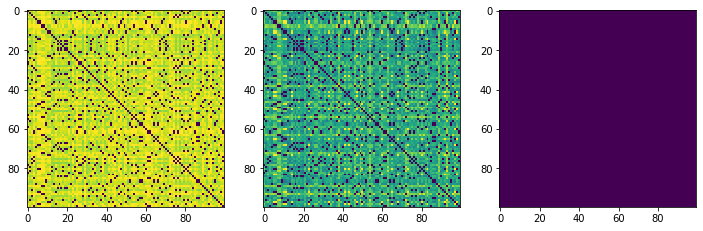

In [9]:
dist_matrix_x = dist_matrix(X)
dist_matrix_x_grp = dist_matrix(x_grp)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
H = axs[0].imshow(dist_matrix_x,vmin=0.9, vmax=0.99)

axs[1].imshow(dist_matrix_x_grp,vmin=0.9, vmax=0.99)
axs[2].imshow(dist_matrix_x-dist_matrix_x_grp,vmin=0.9, vmax=0.99)



### Ejemplo de proyección: SparceRandomProjection

In [10]:
from sklearn import random_projection

transformer = random_projection.SparseRandomProjection()
x_srp = transformer.fit_transform(X)
x_srp.shape


(100, 3947)

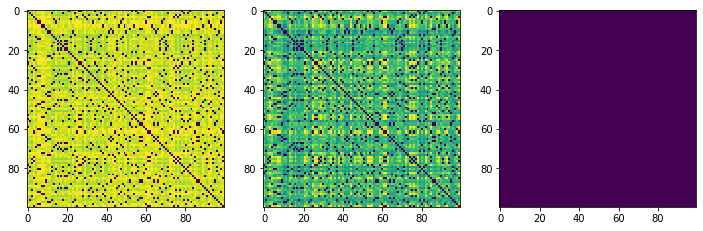

In [13]:
dist_matrix_x = dist_matrix(X)
dist_matrix_x_srp = dist_matrix(x_srp)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))
H = axs[0].imshow(dist_matrix_x,vmin=0.9, vmax=0.99)

axs[1].imshow(dist_matrix_x_srp,vmin=0.9, vmax=0.99)
axs[2].imshow(dist_matrix_x-dist_matrix_x_srp,vmin=0.9, vmax=0.99)



#### ¿Cuándo se obtiene el maximo y minimo?

Verificar si en el ejemplo se satilface el lema enunciado previamente (que es una $\epsilon$-isometría)

### ¿Cuanto cambia una clusterizacion al utilizar proyecciones aleatorias?

Voy a clusterizar X, x_grp y x_srp. Luego, realizare una matriz de contingencia que me permita comparar las clusterizaciones. El objetivo es ver si los clusters generados en cada caso son "parecidos".

In [14]:
kmeans_x = KMeans(n_clusters=2, random_state=0).fit(X)
x_labels = kmeans_x.labels_


kmeans_x_grp = KMeans(n_clusters=2, random_state=0).fit(x_grp)
x_grp_labels = kmeans_x_grp.labels_


kmeans_x_srp = KMeans(n_clusters=2, random_state=0).fit(x_srp)
x_srp_labels = kmeans_x_srp.labels_

#kmeans.predict([[0, 0], [12, 3]])

#kmeans.cluster_centers_


In [15]:

adjusted_rand_score(x_labels, x_grp_labels)


0.6346863468634686

In [16]:
adjusted_rand_score(x_labels, x_srp_labels)

-0.0672703751617076